In [1]:
!pip install yfinance wget pandas -U
# Import libraries
import requests
import wget
import pickle
# from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import time
import io
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as plticker

pd.options.mode.chained_assignment = None

#Предобработка

In [ ]:
!wget -nc https://github.com/qununc/financials_repo/raw/main/pickled_ticker_list

--2022-04-02 18:34:02--  https://github.com/qununc/financials_repo/raw/main/pickled_ticker_list
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/qununc/financials_repo/main/pickled_ticker_list [following]
--2022-04-02 18:34:02--  https://raw.githubusercontent.com/qununc/financials_repo/main/pickled_ticker_list
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84719 (83K) [application/octet-stream]
Saving to: ‘pickled_ticker_list’

pickled_ticker_list 100%[===================>]  82.73K  --.-KB/s    in 0.02s   

2022-04-02 18:34:02 (5.14 MB/s) - ‘pickled_ticker_list’ saved [84719/84719]



In [ ]:
with open ('/content/pickled_ticker_list', 'rb') as fp:
    ticker_list = pickle.load(fp)

In [ ]:
ticker_list[-5:]

['ZWS', 'ZY', 'ZYME', 'ZYNE', 'ZYXI']

In [142]:
# Input Start and End Date
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2022,1,1)

In [140]:
# Symbols = ['^GSPC']

In [144]:
snp500_values = yf.download('^GSPC',start=start, end=end, progress=False, show_errors=False)\
    .loc[:, ['Adj Close', 'Volume']]\
    .info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2012-01-03 to 2021-12-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2517 non-null   float64
 1   Volume     2517 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 59.0 KB


In [ ]:

t0 = time.time()

# create empty dataframe
stock_final = pd.DataFrame()

# iterate over each symbol
for i in tqdm(Symbols):  
    
    # print the symbol which is being downloaded
    # print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False, show_errors=False).loc[:, ['Adj Close', 'Volume']]
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None
        
t1 = time.time()

total = t1-t0

100%|██████████| 6262/6262 [1:52:46<00:00,  1.08s/it]


In [ ]:
stock_final.head()

,Adj Close,Volume,Name
Date,,,
2012-01-03,23.559669,4156394.0,A
2012-01-04,23.372385,4651845.0,A
2012-01-05,23.895493,6842651.0,A
2012-01-06,24.153835,4711400.0,A
2012-01-09,24.786739,4429563.0,A


In [ ]:
# stock_final['Volume'] = stock_final['Volume'].astype(np.uint32)
stock_final['Name'] = stock_final['Name'].astype('category')
stock_final = stock_final.dropna().reset_index()
stock_final.to_csv('stock_final_2012-2022.csv.xz', compression='xz', index = False)

In [ ]:
stock_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857482 entries, 0 to 9857481
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date       datetime64[ns]
 1   Adj Close  float64       
 2   Volume     float64       
 3   Name       category      
dtypes: category(1), datetime64[ns](1), float64(2)
memory usage: 244.6 MB


In [ ]:
stock_final = pd.read_csv('/content/stock_final_2012-2022.csv.xz')

NameError: ignored

In [ ]:
stock_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857482 entries, 0 to 9857481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Adj Close  float64
 2   Volume     float64
 3   Name       object 
dtypes: float64(2), object(2)
memory usage: 300.8+ MB


In [ ]:
stock_final.Name.unique()

array(['A', 'AA', 'AAC', ..., 'ZYME', 'ZYNE', 'ZYXI'], dtype=object)

In [ ]:
stock_final.sample(5)

,Date,Adj Close,Volume,Name
6466743,2019-09-05,10.500000,0.0,OLB
8963870,2013-11-26,20.280001,2995600.0,UAA
1509129,2016-07-15,25.869408,30900.0,CAC
4782257,2012-11-06,3.880000,121700.0,JKS
3295481,2012-08-20,30.329435,1432300.0,FE


In [ ]:
# stock_final_dropped = pd.read_csv('/content/stock_final_dropped_2010-2022.csv.xz')

In [ ]:
stock_final['Volume'] = stock_final['Volume'].astype(np.uint32)
stock_final['Name'] = stock_final['Name'].astype('category')

In [ ]:
stock_final[stock_final['Volume'] > 10000].sort_values('Adj Close', ascending=False).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8347435 entries, 8733941 to 1872758
Data columns (total 4 columns):
 #   Column     Dtype   
---  ------     -----   
 0   Date       object  
 1   Adj Close  float64 
 2   Volume     uint32  
 3   Name       category
dtypes: category(1), float64(1), object(1), uint32(1)
memory usage: 239.0+ MB


In [ ]:
stock_result = stock_final[stock_final['Volume'] > 10000].drop(['Volume'], axis=1)
stock_result.rename({'Adj Close' : 'adj_close'}, axis=1, inplace=True)
stock_result['adj_close'] = stock_result['adj_close'].round(2)
stock_result['Date'] = pd.to_datetime(stock_result['Date'], infer_datetime_format=True)

In [ ]:
stock_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8347435 entries, 0 to 9857481
Data columns (total 3 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date       datetime64[ns]
 1   adj_close  float64       
 2   Name       category      
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 207.2 MB


In [ ]:
stock_result.tail(5)

,Date,adj_close,Name
9857477,2021-12-27,9.53,ZYXI
9857478,2021-12-28,9.14,ZYXI
9857479,2021-12-29,9.06,ZYXI
9857480,2021-12-30,9.30,ZYXI
9857481,2021-12-31,9.06,ZYXI


In [ ]:
stock_result.Name.unique()

['A', 'AA', 'AAC', 'AACG', 'AACI', ..., 'ZWS', 'ZY', 'ZYME', 'ZYNE', 'ZYXI']
Length: 6052
Categories (6064, object): ['A', 'AA', 'AAC', 'AACG', ..., 'ZY', 'ZYME', 'ZYNE', 'ZYXI']

In [ ]:
stock_result.to_csv('stock_result_2012-2022.csv.xz', compression='xz', index = False)
# stock_result = pd.read_csv('/content/stock_result_2012-2022.csv.xz')

In [ ]:
grouped = stock_result.groupby('Name')['adj_close']
grouped.head()

In [ ]:
df3 = stock_result.set_index(['Date','Name']).stack().unstack(1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2517 entries, (Timestamp('2012-01-03 00:00:00'), 'adj_close') to (Timestamp('2021-12-31 00:00:00'), 'adj_close')
Columns: 6052 entries, A to ZYXI
dtypes: float64(6052)
memory usage: 116.3+ MB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2517 entries, (Timestamp('2012-01-03 00:00:00'), 'adj_close') to (Timestamp('2021-12-31 00:00:00'), 'adj_close')
Columns: 6052 entries, A to ZYXI
dtypes: float64(6052)
memory usage: 116.3+ MB


In [ ]:
df3.dropna(axis=1, how='any').isnull().sum(axis=1).sort_values(ascending=False)[:5]

Date                 
2012-01-03  adj_close    0
2018-09-10  adj_close    0
2018-08-29  adj_close    0
2018-08-30  adj_close    0
2018-08-31  adj_close    0
dtype: int64

In [ ]:
stock_grouped_dropped = df3.dropna(axis=1).droplevel(level=1)
stock_grouped_dropped.columns = stock_grouped_dropped.columns.to_list()

In [ ]:
stock_grouped_dropped.sample(3)

,A,AA,AAIC,AAL,AAON,AAP,AAPL,AAT,AAWW,AB,...,YELL,YNDX,YUM,ZBH,ZBRA,ZD,ZG,ZION,ZNGA,ZUMZ
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-17,37.33,22.48,9.48,24.61,18.66,103.90,17.55,25.03,37.73,10.52,...,13.99,38.39,44.15,82.04,50.99,40.10,24.31,24.65,4.14,24.39
2018-07-10,62.00,47.73,8.11,38.29,34.51,135.88,45.82,34.13,71.50,21.33,...,10.74,37.05,74.30,108.52,149.87,77.34,61.70,48.88,4.19,23.95
2016-09-09,42.88,22.90,8.22,37.10,25.85,147.21,24.11,36.40,38.56,13.39,...,11.51,20.31,56.74,116.43,66.12,59.16,33.21,27.41,2.73,17.39


In [ ]:
# stock_grouped_dropped.to_csv('stock_grouped_dropped_2517d_1607ticers.csv.xz')

#Обработка

In [198]:
!wget -nc https://github.com/qununc/financials_repo/raw/main/stock_grouped_dropped_2517d_1607ticers.csv.xz
stock_grouped_dropped = pd.read_csv('stock_grouped_dropped_2517d_1607ticers.csv.xz', parse_dates=True, index_col='Date').drop(['OAS', 'WLL', 'GME', 'LXRX', 'CRIS', 'DDD', 'EXPR', 'PEI'], axis=1)
# stock_grouped_dropped['Date'] = pd.to_datetime(stock_grouped_dropped['Date'], infer_datetime_format=True)

File ‘stock_grouped_dropped_2517d_1607ticers.csv.xz’ already there; not retrieving.



In [188]:
stock_grouped_dropped.head(5)

,A,AA,AAIC,AAL,AAON,AAP,AAPL,AAT,AAWW,AB,...,YELL,YNDX,YUM,ZBH,ZBRA,ZD,ZG,ZION,ZNGA,ZUMZ
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,23.56,20.82,6.11,4.83,8.47,65.83,12.58,15.70,38.88,5.83,...,8.98,19.74,34.62,47.89,35.72,25.08,7.19,14.63,9.45,26.46
2012-01-04,23.37,21.32,5.93,4.74,8.40,67.38,12.64,15.19,39.28,6.11,...,9.30,19.15,34.86,47.24,35.45,24.57,7.17,14.95,9.19,26.33
2012-01-05,23.90,21.12,5.99,5.16,8.35,67.81,12.78,15.37,38.70,6.41,...,9.29,19.29,35.12,47.80,35.40,25.06,7.17,15.37,8.91,30.95
2012-01-06,24.15,20.67,5.90,5.28,8.26,68.12,12.92,15.28,39.02,6.45,...,9.30,18.61,35.38,47.92,35.11,24.77,7.18,15.39,8.81,31.27
2012-01-09,24.79,21.28,5.87,5.39,8.24,68.10,12.90,14.95,39.90,6.42,...,9.19,18.73,35.24,48.28,34.95,24.33,7.18,15.59,8.00,31.78


In [117]:
stock_grouped_dropped.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2012-01-03 to 2021-12-31
Columns: 1604 entries, A to ZUMZ
dtypes: float64(1604)
memory usage: 30.8 MB


In [78]:
# (stock_grouped_dropped["A"] - stock_grouped_dropped["A"].shift())/stock_grouped_dropped["A"].shift()

In [199]:
stock_returned = stock_grouped_dropped.copy()
for col in stock_returned:
    stock_returned[col] = (stock_returned[col] - stock_returned[col].shift())/stock_returned[col].shift()
stock_returned = stock_returned.fillna(0)

In [200]:
stock_returned['2012-02-01':'2012-02-10']

,A,AA,AAIC,AAL,AAON,AAP,AAPL,AAT,AAWW,AB,...,YELL,YNDX,YUM,ZBH,ZBRA,ZD,ZG,ZION,ZNGA,ZUMZ
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-01,0.040467,0.006981,0.031299,0.054020,0.052948,0.000274,-0.000716,0.022878,0.030023,0.018209,...,0.032180,0.015241,0.013560,0.001669,0.053647,0.040102,0.003261,0.010899,0.010486,0.028711
2012-02-02,-0.010512,0.021664,0.007587,0.025030,0.011429,-0.005066,-0.002151,-0.003531,-0.007949,0.034277,...,0.001559,0.035835,-0.006296,0.008330,-0.022072,0.012305,0.029252,0.017520,0.168868,-0.028251
2012-02-03,0.035411,0.032655,0.018072,0.056977,0.015819,0.008394,0.010057,0.024217,0.043559,0.031700,...,0.028016,0.020103,0.001056,0.018726,0.007438,0.028768,0.048421,0.041722,0.080710,0.040981
2012-02-06,-0.013680,-0.002053,-0.005917,-0.050605,-0.020022,-0.000955,0.009246,-0.017878,0.010829,-0.009777,...,-0.037850,-0.014665,-0.010285,0.001261,0.003310,-0.000788,-0.003012,0.001907,-0.046303,-0.000336
2012-02-07,-0.001387,-0.006173,-0.002976,0.009270,-0.021566,0.005054,0.010571,0.004698,0.014998,-0.001410,...,0.055075,0.000000,0.026379,-0.003600,0.002791,0.006701,0.007049,0.015228,0.042287,-0.011107
2012-02-08,0.008333,0.000000,0.023881,-0.014925,-0.037123,0.020658,0.016736,-0.006429,-0.021109,-0.002825,...,-0.000746,0.018605,-0.006490,0.001806,-0.004555,0.015662,0.007000,0.012500,0.028550,0.001021
2012-02-09,0.002755,-0.002899,0.000000,-0.015152,-0.021687,0.016378,0.034294,-0.018824,-0.013723,0.012748,...,-0.029104,0.010959,0.007316,-0.023080,0.012710,-0.018119,0.000000,-0.003704,-0.032140,0.015301
2012-02-10,-0.020948,-0.032807,-0.014577,-0.013018,-0.040640,-0.001572,0.000663,-0.008393,-0.017293,-0.130070,...,0.002306,-0.039295,-0.002594,-0.003138,-0.014809,-0.007460,0.007944,-0.007435,0.006038,-0.016075


In [191]:
stock_returned.loc[stock_returned.index[0]:stock_returned.index[0] + pd.DateOffset(months=1)].std().values

array([0.02047951, 0.01652451, 0.01550656, ..., 0.02561237, 0.0545269 ,
       0.04172275])

In [61]:
stock_returned.index[0] + pd.DateOffset(months=3) - pd.DateOffset(months=3)

Timestamp('2012-01-03 00:00:00')

In [62]:
pd.date_range(start=stock_returned.index[0] + pd.DateOffset(months=3), end=stock_returned.index[0] + pd.DateOffset(months=6), freq='M')

DatetimeIndex(['2012-04-30', '2012-05-31', '2012-06-30'], dtype='datetime64[ns]', freq='M')

In [63]:
pd.Timestamp('2012-04-30') < pd.Timestamp('2012-05-30')

True

In [201]:
stds_df = pd.DataFrame(columns=stock_returned.columns)
calc_date = start=stock_returned.index[0] + pd.DateOffset(months=3)

while calc_date < stock_returned.index[-1] - pd.DateOffset(months=3):
    start_of_period = calc_date - pd.DateOffset(months=3)
    # print(start_of_period)
    std_devs = stock_returned.loc[start_of_period:calc_date].std()
    # print(std_devs)
    stds_df.loc[calc_date] = std_devs
    calc_date += pd.DateOffset(months=1)

In [121]:
stds_df.iloc[0].sort_values(ascending=True)[-6:]

AGEN    0.062304
INFI    0.064788
JKS     0.066897
AMPE    0.067930
CORT    0.068061
MVIS    0.080066
Name: 2012-04-03 00:00:00, dtype: float64

In [66]:
stds_df.index

DatetimeIndex(['2012-04-03', '2012-05-03', '2012-06-03', '2012-07-03',
               '2012-08-03', '2012-09-03', '2012-10-03', '2012-11-03',
               '2012-12-03', '2013-01-03',
               ...
               '2020-12-03', '2021-01-03', '2021-02-03', '2021-03-03',
               '2021-04-03', '2021-05-03', '2021-06-03', '2021-07-03',
               '2021-08-03', '2021-09-03'],
              dtype='datetime64[ns]', length=114, freq=None)

In [202]:
class Portfolios_returns_on_date:
    stock_g_d = stock_grouped_dropped

    def __init__(self, x_date, stds_df_input) -> None:
        self.x_date = x_date
        self.std_dev_asc = stds_df_input.loc[x_date].sort_values(ascending=True)
    
    def form_portfolios(self, stock_prices=stock_g_d):
        self.high_vol_portf = self.std_dev_asc[-6:]
        self.low_vol_portf = self.std_dev_asc[:6]

        try:
            self.high_vol_portf_return = 0
            for ticker in self.high_vol_portf.index:
                stock_3m_return = stock_prices[ticker][self.x_date] / stock_prices[ticker][self.x_date - pd.DateOffset(months=3)] - 1
                self.high_vol_portf[ticker] = stock_3m_return
                self.high_vol_portf_return += stock_3m_return / self.high_vol_portf.index.shape[0]

            self.low_vol_portf_return = 0
            for ticker in self.low_vol_portf.index:
                stock_3m_return = stock_prices[ticker][self.x_date] / stock_prices[ticker][self.x_date - pd.DateOffset(months=3)] - 1
                self.low_vol_portf[ticker] = stock_3m_return
                self.low_vol_portf_return += stock_3m_return / self.low_vol_portf.index.shape[0]
        except:
            self.high_vol_portf_return = 0
            for ticker in self.high_vol_portf.index:
                stock_3m_return = stock_prices[ticker].asof(self.x_date) / stock_prices[ticker].asof(self.x_date - pd.DateOffset(months=3)) - 1
                self.high_vol_portf[ticker] = stock_3m_return
                self.high_vol_portf_return += stock_3m_return / self.high_vol_portf.index.shape[0]

            self.low_vol_portf_return = 0
            for ticker in self.low_vol_portf.index:
                stock_3m_return = stock_prices[ticker].asof(self.x_date) / stock_prices[ticker].asof(self.x_date - pd.DateOffset(months=3)) - 1
                self.low_vol_portf[ticker] = stock_3m_return
                self.low_vol_portf_return += stock_3m_return / self.low_vol_portf.index.shape[0]

        self.high_vol_portf_return = self.high_vol_portf_return.round(4)
        self.low_vol_portf_return = self.low_vol_portf_return.round(4)

    def printout(self):
        print('Date: ', self.x_date)

        print('high_vol_portf tickers: ', self.high_vol_portf.index.values)
        print('high_vol_portf 3M return: ', self.high_vol_portf_return)

        print('low_vol_portf tickers: ', self.low_vol_portf.index.values)
        print('low_vol_portf 3M return: ', self.low_vol_portf_return)

In [69]:
stds_df.loc[test_date]

A       0.019992
AA      0.019744
AAIC    0.013457
AAL     0.039145
AAON    0.019703
          ...   
ZD      0.011461
ZG      0.034528
ZION    0.022599
ZNGA    0.040227
ZUMZ    0.027539
Name: 2012-06-03 00:00:00, Length: 1606, dtype: float64

In [246]:
stock_grouped_dropped.loc[find_date]

A       98.22
AA      13.64
AAIC     2.61
AAL     11.08
AAON    59.83
        ...  
ZD      50.87
ZG      67.76
ZION    31.47
ZNGA    10.14
ZUMZ    22.00
Name: 2020-08-03 00:00:00, Length: 1599, dtype: float64

In [71]:
stock_grouped_dropped.sort_index()[high_vol_portf.index[0]].asof('2012-06-03')

5.18

In [123]:
test_date = stds_df.index[2]
high_vol_portf = stds_df.loc[test_date].sort_values()[-6:]
high_vol_portf_return = 0
for ticker in tqdm(high_vol_portf.index):
    stock_3m_return = stock_grouped_dropped.sort_index()[ticker].asof(test_date + pd.DateOffset(months=3)) / stock_grouped_dropped.sort_index()[ticker].asof(test_date) - 1
    high_vol_portf_return += stock_3m_return / high_vol_portf.index.shape[0]

100%|██████████| 6/6 [00:00<00:00, 129.65it/s]


In [124]:
high_vol_portf_return

0.1849877605008052

In [203]:
level_1_label = ['High Volatility','Low Volatility']
level_2_label = list(range(1, 7)) + ['return']
header = pd.MultiIndex.from_product([level_1_label, level_2_label], names=['Portfolio',' '])
result_df = pd.DataFrame(columns=header)
result_df.index.names = ["Date"]

for date in tqdm(stds_df.index):
    portf_on_date = Portfolios_returns_on_date(date, stds_df)
    portf_on_date.form_portfolios()
    print_res = [
                 portf_on_date.high_vol_portf.index.to_list(),
                 [portf_on_date.high_vol_portf_return],
                 portf_on_date.low_vol_portf.index.to_list(),
                 [portf_on_date.low_vol_portf_return]
    ]   


    result_df.loc[date] = np.array([item for sublist in print_res for item in sublist]).T.tolist()

result_df.iloc[:, result_df.columns.get_level_values(1)=='return'] = result_df.iloc[:, result_df.columns.get_level_values(1)=='return'].astype(np.float64)

100%|██████████| 114/114 [00:00<00:00, 135.88it/s]


In [229]:
snp500_values = yf.download('^GSPC',start=start, end=end, progress=False, show_errors=False)\
    .loc[:, ['Adj Close', 'Volume']]

snp500_3m_returns_df = pd.Series()
for date in tqdm(stds_df.index):
    try:
        snp500_3m_returns_df.loc[date] = snp500_values['Adj Close'].loc[date] / snp500_values['Adj Close'].loc[date - pd.DateOffset(months=3)] - 1
    except:
        snp500_3m_returns_df.loc[date] = snp500_values['Adj Close'].asof(date) / snp500_values['Adj Close'].asof(date - pd.DateOffset(months=3)) - 1

snp500_3m_returns_df = snp500_3m_returns_df.fillna(0)
snp500_3m_returns_df.name = 'snp500_3m_returns'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 114/114 [00:00<00:00, 583.86it/s]


In [226]:
snp500_values['Adj Close'].asof(pd.Timestamp('2012-04-03') - pd.DateOffset(months=3))

nan

In [230]:
snp500_3m_returns_df.head()

2012-04-03    0.000000
2012-05-03    0.000000
2012-06-03    0.000000
2012-07-03   -0.027848
2012-08-03   -0.000417
Name: snp500_3m_returns, dtype: float64

In [ ]:
new_test_df = pd.concat([result_df, snp500_3m_returns_df], axis=1)
new_test_df.columns

In [248]:
# stock_grouped_dropped.to_excel('stocks2012-2021.xlsx')
# stds_df.to_excel('stds_df.xlsx')
# result_df.to_excel('result_df.xlsx')
result_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 2012-04-03 to 2021-09-03
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   (High Volatility, 1)       114 non-null    object 
 1   (High Volatility, 2)       114 non-null    object 
 2   (High Volatility, 3)       114 non-null    object 
 3   (High Volatility, 4)       114 non-null    object 
 4   (High Volatility, 5)       114 non-null    object 
 5   (High Volatility, 6)       114 non-null    object 
 6   (High Volatility, return)  114 non-null    float64
 7   (Low Volatility, 1)        114 non-null    object 
 8   (Low Volatility, 2)        114 non-null    object 
 9   (Low Volatility, 3)        114 non-null    object 
 10  (Low Volatility, 4)        114 non-null    object 
 11  (Low Volatility, 5)        114 non-null    object 
 12  (Low Volatility, 6)        114 non-null    object 
 13  (Low Volatility, return)   114 

In [126]:
result_df.iloc[:, result_df.columns.get_level_values(1)=='return'].iloc[:, 0]

Date
2012-04-03   -0.0430
2012-05-03    0.1034
2012-06-03    0.1850
2012-07-03    0.1060
2012-08-03    0.4000
               ...  
2021-05-03   -0.0133
2021-06-03   -0.1909
2021-07-03   -0.2083
2021-08-03   -0.0817
2021-09-03    0.0828
Name: (High Volatility, return), Length: 114, dtype: float64

In [204]:
find_date = result_df.iloc[:, result_df.columns.get_level_values(1)=='return'].iloc[:, 0].idxmax()
debug_portf = Portfolios_returns_on_date(find_date, stds_df)
debug_portf.form_portfolios()
debug_portf.high_vol_portf


YELL    0.788820
RIGL    0.421053
KIRK    5.922222
TUP     3.641844
NBR     2.398545
MVIS    3.545455
Name: 2020-08-03 00:00:00, dtype: float64

In [155]:
find_date = result_df.iloc[:, result_df.columns.get_level_values(1)=='return'].iloc[:, 0].idxmax()
result_df.loc[find_date]

Portfolio              
High Volatility  1            GSM
                 2           FOSL
                 3            DDD
                 4           LXRX
                 5           EXPR
                 6           CRIS
                 return    5.2794
Low Volatility   1            PNM
                 2            CHT
                 3            EQC
                 4             VZ
                 5            PEP
                 6             RY
                 return    0.0334
Name: 2021-02-03 00:00:00, dtype: object

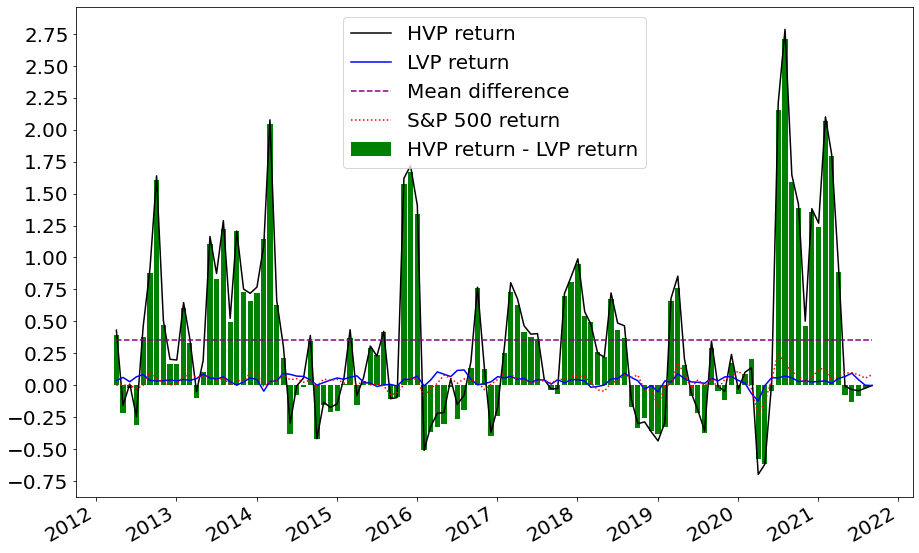

In [243]:
days = result_df.index
y_high = result_df.iloc[:, result_df.columns.get_level_values(1)=='return'].iloc[:, 0]
y_low = result_df.iloc[:, result_df.columns.get_level_values(1)=='return'].iloc[:, 1]

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(days, y_high.values, color="black", label='HVP return')
ax.plot(days, y_low.values, color="blue", label='LVP return')
ax.bar(days, y_high.values - y_low.values, color="green", width=24, label='HVP return - LVP return')
mean_line = ax.plot(days, [(y_high.values - y_low.values).mean()]*len(y_high), color='purple', label='Mean difference', linestyle='--')
snp500_plot = ax.plot(days, snp500_3m_returns_df.values, color="red", label='S&P 500 return', linestyle=':')

loc = plticker.MultipleLocator(base=0.25) # this locator puts ticks at regular intervals
ax.yaxis.set_major_locator(loc)
legend = ax.legend(loc='upper center')

hfmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(hfmt)
plt.gcf().autofmt_xdate()
plt.savefig("return_diffs.svg")
plt.show()

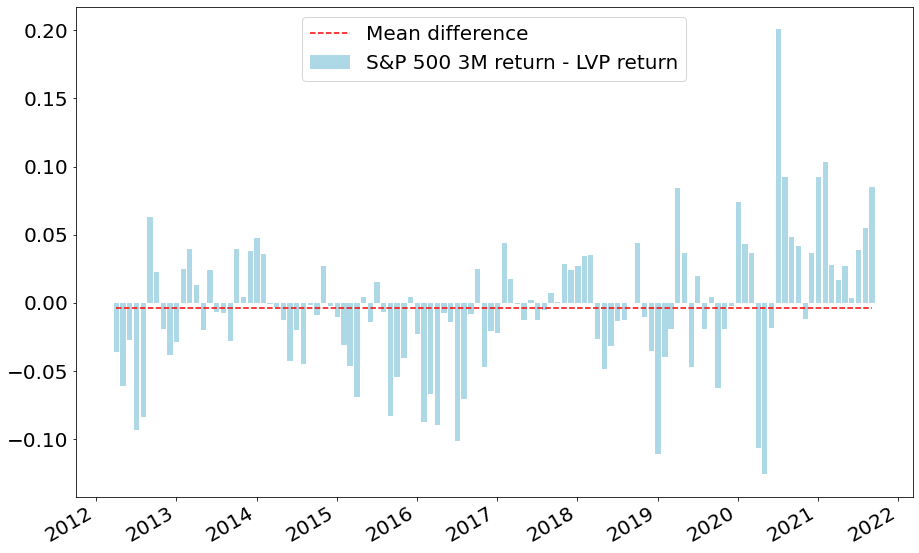

In [249]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(15, 10))
snp500diff = snp500_3m_returns_df.values - y_low.values

ax.bar(days, snp500_3m_returns_df.values - y_low.values, color="lightblue", width=24, label='S&P 500 3M return - LVP return')
mean_line = ax.plot(days, [snp500diff.mean()]*len(y_low), color='red', label='Mean difference', linestyle='--')

loc = plticker.MultipleLocator(base=0.05) # this locator puts ticks at regular intervals
ax.yaxis.set_major_locator(loc)
legend = ax.legend(loc='upper center')

hfmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(hfmt)
plt.gcf().autofmt_xdate()
plt.savefig("return_diffs_and_snp500.svg")
plt.show()

In [253]:
snp500diff.max()

0.20061407493591504